# Importing libraries

In [10]:
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn keras

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Introduction

## Goal
Use a Long Short-Term Memory (LSTM) model to predict the stock price of Ford Motor Company.

## Why LSTM?
LSTM is a type of Recurrent Neural Network (RNN) built specifically to learn patterns in time-series data — especially when past information matters, as it does for predicting stock prices based on historical data.


# Get Ford's Stock Data
In order to get the stock data for the Ford stock we'll use **Yahoo Finance** (yfinance)

In [11]:
stock = 'F'
data = yf.download(stock, start = '2016-01-01', end = '2025-01-01')
data.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,F,F,F,F,F
Date,,,,,
2016-01-04,8.395437,8.413466,8.263225,8.335341,38618500
2016-01-05,8.245199,8.413468,8.118997,8.395440,50267500
2016-01-06,7.878612,8.149045,7.842554,8.149045,61285500
2016-01-07,7.632216,7.836544,7.572121,7.752409,57846700
2016-01-08,7.536063,7.872602,7.512024,7.842553,46199400


With the data now obtained we can visualize it to better understand the data.

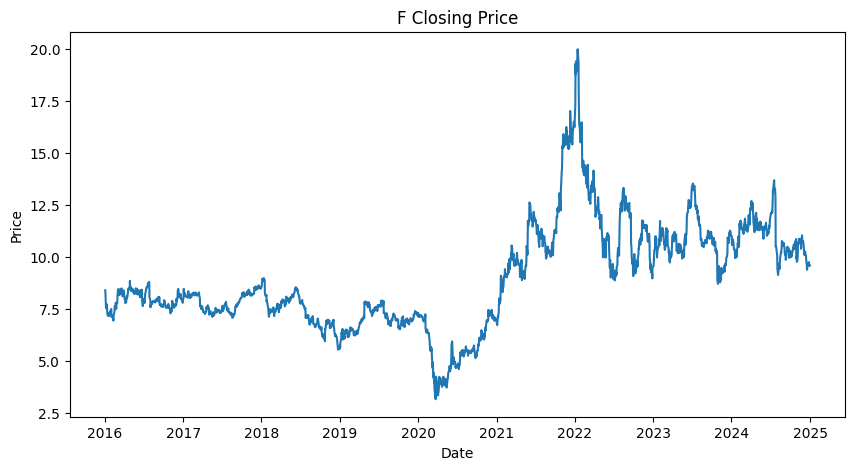

In [12]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title(f'{stock} Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Preprocess Data for the LSTM

In [18]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data['Close'])

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build the LSTM Model

In [14]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


# Train/Test split

In [15]:
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size - 60:]

X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Train the model

In [16]:
model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 19s 126ms/step - loss: 0.0250
Epoch 2/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 0.0013
Epoch 3/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0010
Epoch 4/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 9.4071e-04
Epoch 5/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 8.8026e-04
Epoch 6/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 7.6193e-04
Epoch 7/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 7.3119e-04
Epoch 8/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 99ms/step - loss: 7.1507e-04
Epoch 9/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 6.7749e-04
Epoch 10/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 6.6771e-04
Epoch 11/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 5.2731e-04
Epoch 12/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 5.3884e-04
Epoch 13/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 4.6571e-04
Epoch 14/20
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 4.6400e-04
Epoch 15/20
69/69 ━━━━━━━

# Predict and Visualize

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


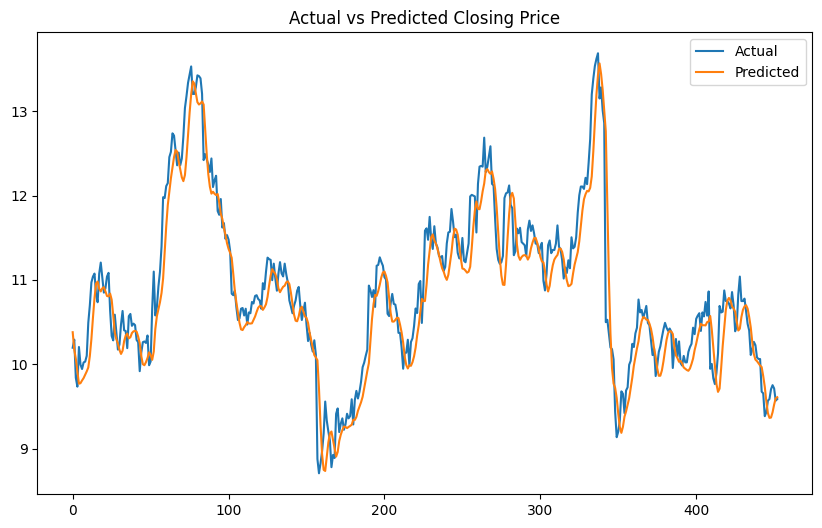

In [19]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1,1))

plt.figure(figsize=(10,6))
plt.plot(real_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Closing Price')
plt.show()